Name-Vipul Anand
Assignment-Avocardo project
Batch-DS2312

Problem Statement-
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.


In [1]:
#First of all we have to import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [118]:
#Now let us import the dataset
data=pd.read_csv("C:\\Users\\vipul\\OneDrive\\Documents\\datatrained\\avocado.csv")

In [119]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [120]:
#At the first glance the unnamed: 0 column seems to be unrelated with the dataset so let us analyse this and 
#after that we can make a decesion to keep it or delete it
data['Unnamed: 0'].value_counts()

Unnamed: 0
0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: count, dtype: int64

In [121]:
data['Unnamed: 0'].nunique()

53

let us see the relation of the unnamed with the label after that we can make a conclusion to keep it or delete it

In [122]:
data[['Unnamed: 0','AveragePrice']].corr()

,Unnamed: 0,AveragePrice
Unnamed: 0,1.000000,-0.133008
AveragePrice,-0.133008,1.000000


In [123]:
#Let us make a copy of this dataset we will use one without any changes to make a model and to compare the accuracy
data_copy=data

This column is somewhat related to the model so we will keep this but we will have to transform it after that we can use this for the model

In [320]:
region=data['Unnamed: 0'].value_counts().index

In [321]:
region

Index([ 0,  7,  1, 11,  9,  8, 10,  6,  5,  4,  3,  2, 41, 34, 35, 36, 37, 38,
       39, 40, 47, 42, 43, 44, 45, 46, 32, 48, 49, 50, 33, 26, 31, 30, 12, 13,
       14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 51, 52],
      dtype='int64', name='Unnamed: 0')

In [126]:
def unnamed(value):
    if value in region[:6]:
        return 1
    if value in region[6:12]:
        return 2
    if value in region[12:18]:
        return 3
    if value in region[18:24]:
        return 4
    if value in region[24:30]:
        return 5
    if value in region[30:36]:
        return 6
    if value in region[36:42]:
        return 7
    if value in region[42:48]:
        return 8
    if value in region[48:]:
        return 9

In [127]:
data['Unnamed: 0']=data['Unnamed: 0'].apply(unnamed)

In [128]:
data['Unnamed: 0'].value_counts()

Unnamed: 0
1    2592
2    2592
6    1944
7    1944
8    1944
5    1944
3    1944
4    1944
9    1401
Name: count, dtype: int64

In [129]:
#Now let us check the relation if there is any increment or decrement
data[['Unnamed: 0','AveragePrice']].corr()

,Unnamed: 0,AveragePrice
Unnamed: 0,1.000000,0.056269
AveragePrice,0.056269,1.000000


Earlier there was a positive relation now there is a negative relation

In [130]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [131]:
#Now let us treat the date column
data['Date']=pd.to_datetime(data['Date'])

In [132]:
data['Month']=data['Date'].dt.month

In [133]:
data['Day']=data['Date'].dt.day
data['Year']=data['Date'].dt.year

In [134]:
data['Day'].value_counts()

Day
4     756
11    756
18    755
25    755
1     648
26    648
5     648
12    648
3     648
8     648
15    648
22    648
24    648
17    648
10    648
19    648
7     540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
6     539
2     432
9     432
23    432
30    432
31    432
16    432
Name: count, dtype: int64

In [135]:
data['Year'].value_counts()

Year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

In [136]:
#let subdivide into summer , winter, spring and autumn
def month(value):
    if value in (3,4,5):
        return 'spring'
    if value in (6,7,8):
        return 'summer'
    if value in (9,10,11):
        return 'autumn'
    if value in (12,1,2):
        return 'winter'
data['Month']=data['Month'].apply(month)

In [137]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
data['Month']=lab_enc.fit_transform(data['Month'])

In [138]:
data['Month'].value_counts()

Month
3    5075
1    4752
0    4212
2    4210
Name: count, dtype: int64

In [139]:
#we can divide the day into start , end and the middle of them month
def day(value):
    if value in list(range(1,11)):
        return 'start of month'
    if value in list(range(11,21)):
        return 'middle of month'
    if value in list(range(21,32)):
        return 'end of month'

In [140]:
data['Day']=data['Day'].apply(day)

In [141]:
data['Day']=lab_enc.fit_transform(data['Day'])

In [142]:
data['Day'].value_counts()

Day
0    6155
1    6155
2    5939
Name: count, dtype: int64

In [143]:
data['Year'].value_counts()
#It is already encoded

Year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

In [144]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,Year
0,1,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,3,0,2015
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,3,1,2015
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,3,1,2015
3,2,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,3,2,2015
4,2,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,0,0,2015


In [145]:
#So now let us encode the categoical columns after that we can  visualize the distribution
data['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [146]:
data['type']=lab_enc.fit_transform(data['type'])

In [147]:
data['type'].value_counts()

type
0    9126
1    9123
Name: count, dtype: int64

In [148]:
data['region'].value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

In [149]:
#there are 54 unique values and working with these many values is not feasible so we will make use of grouping the columns
region=data['region'].value_counts().index

In [150]:
len(region)

54

In [151]:
def Region(value):
    if value in region[:6]:
        return 1
    if value in region[6:12]:
        return 2
    if value in region[12:18]:
        return 3
    if value in region[18:24]:
        return 4
    if value in region[24:30]:
        return 5
    if value in region[30:36]:
        return 6
    if value in region[36:42]:
        return 7
    if value in region[42:48]:
        return 8
    if value in region[48:54]:
        return 9

In [152]:
data['region']=data['region'].apply(Region)

In [153]:
data['region'].value_counts()

region
1    2028
3    2028
6    2028
7    2028
8    2028
5    2028
2    2028
4    2028
9    2025
Name: count, dtype: int64

In [154]:
data['region'].dtype

dtype('int64')

There is no need to encode this data anymore now

In [155]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,Year
0,1,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,1,3,0,2015
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,1,3,1,2015
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,1,3,1,2015
3,2,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,1,3,2,2015
4,2,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,1,0,0,2015


In [156]:
#Now let us proceed to the other steps
data.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
Year            0
dtype: int64

In [159]:
#the data column is of no use now so we can drop this 
data=data.drop(columns='Date')

In [160]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,Year
0,1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,1,3,0,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,1,3,1,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,1,3,1,2015
3,2,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,1,3,2,2015
4,2,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,1,0,0,2015


And there is no nulls in the data we have also seen this

<Axes: >

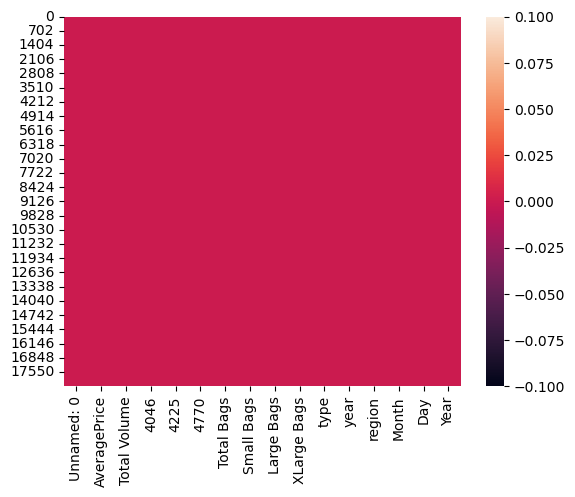

In [161]:
sns.heatmap(data.isna())

In [47]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,Year
0,1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,1,3,0,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,1,3,1,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,1,3,1,2015
3,2,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,1,3,2,2015
4,2,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,1,0,0,2015


In [163]:
#We only care about the distribution of the continous columns so let us se them
continous=['Total Volume','4046','4770','4225','Total Bags','Large Bags','XLarge Bags','Small Bags']

In [164]:
data[continous]

,Total Volume,4046,4770,4225,Total Bags,Large Bags,XLarge Bags,Small Bags
0,64236.62,1036.74,48.16,54454.85,8696.87,93.25,0.0,8603.62
1,54876.98,674.28,58.33,44638.81,9505.56,97.49,0.0,9408.07
2,118220.22,794.70,130.50,109149.67,8145.35,103.14,0.0,8042.21
3,78992.15,1132.00,72.58,71976.41,5811.16,133.76,0.0,5677.40
4,51039.60,941.48,75.78,43838.39,6183.95,197.69,0.0,5986.26
...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,0.00,1529.20,13498.67,431.85,0.0,13066.82
18245,13888.04,1191.70,0.00,3431.50,9264.84,324.80,0.0,8940.04
18246,13766.76,1191.92,727.94,2452.79,9394.11,42.31,0.0,9351.80
18247,16205.22,1527.63,727.01,2981.04,10969.54,50.00,0.0,10919.54


#We only care about the distribution of the continous columns and we know that the average price is also continous but that
is the label that is why we do not added them because here we will visualize the data and delete the data on the basis of it

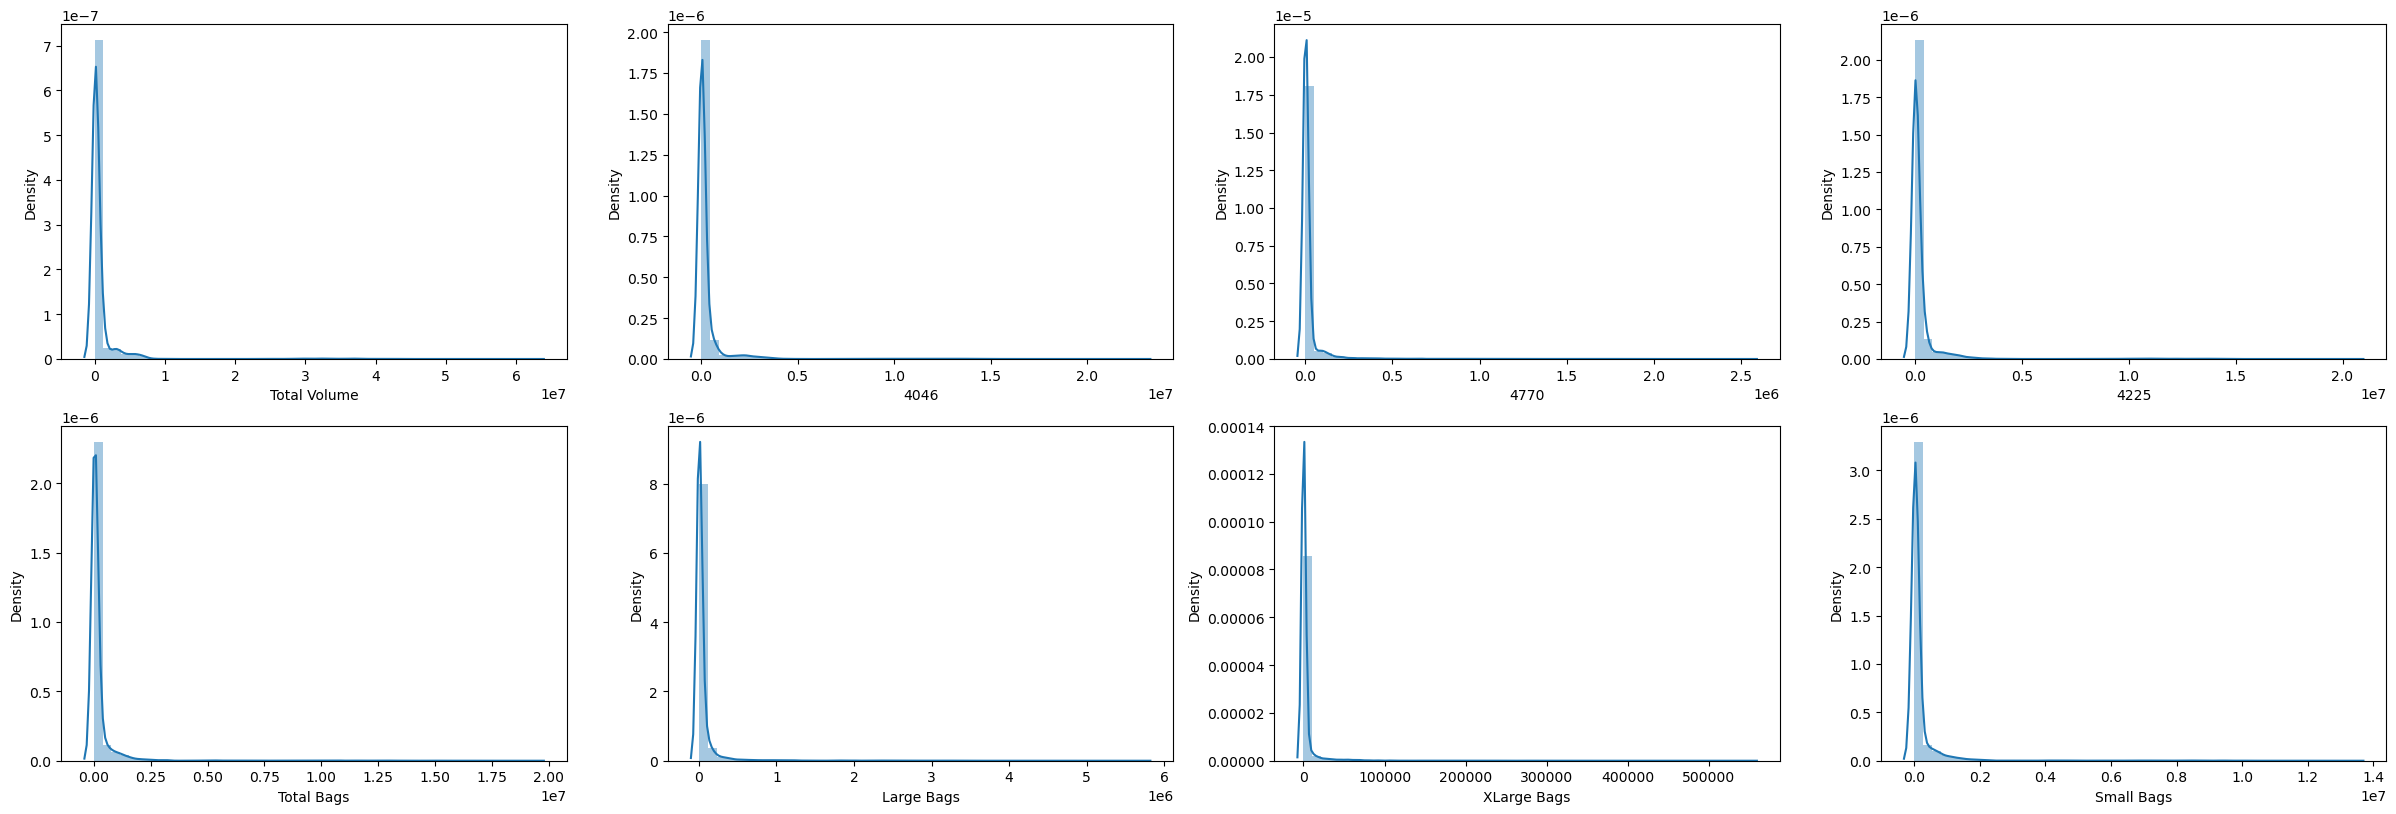

In [50]:
plt.figure(figsize=(30,20))
plotnumber=1
for i in data[continous]:
    plt.subplot(4,4,plotnumber)
    sns.distplot(data[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

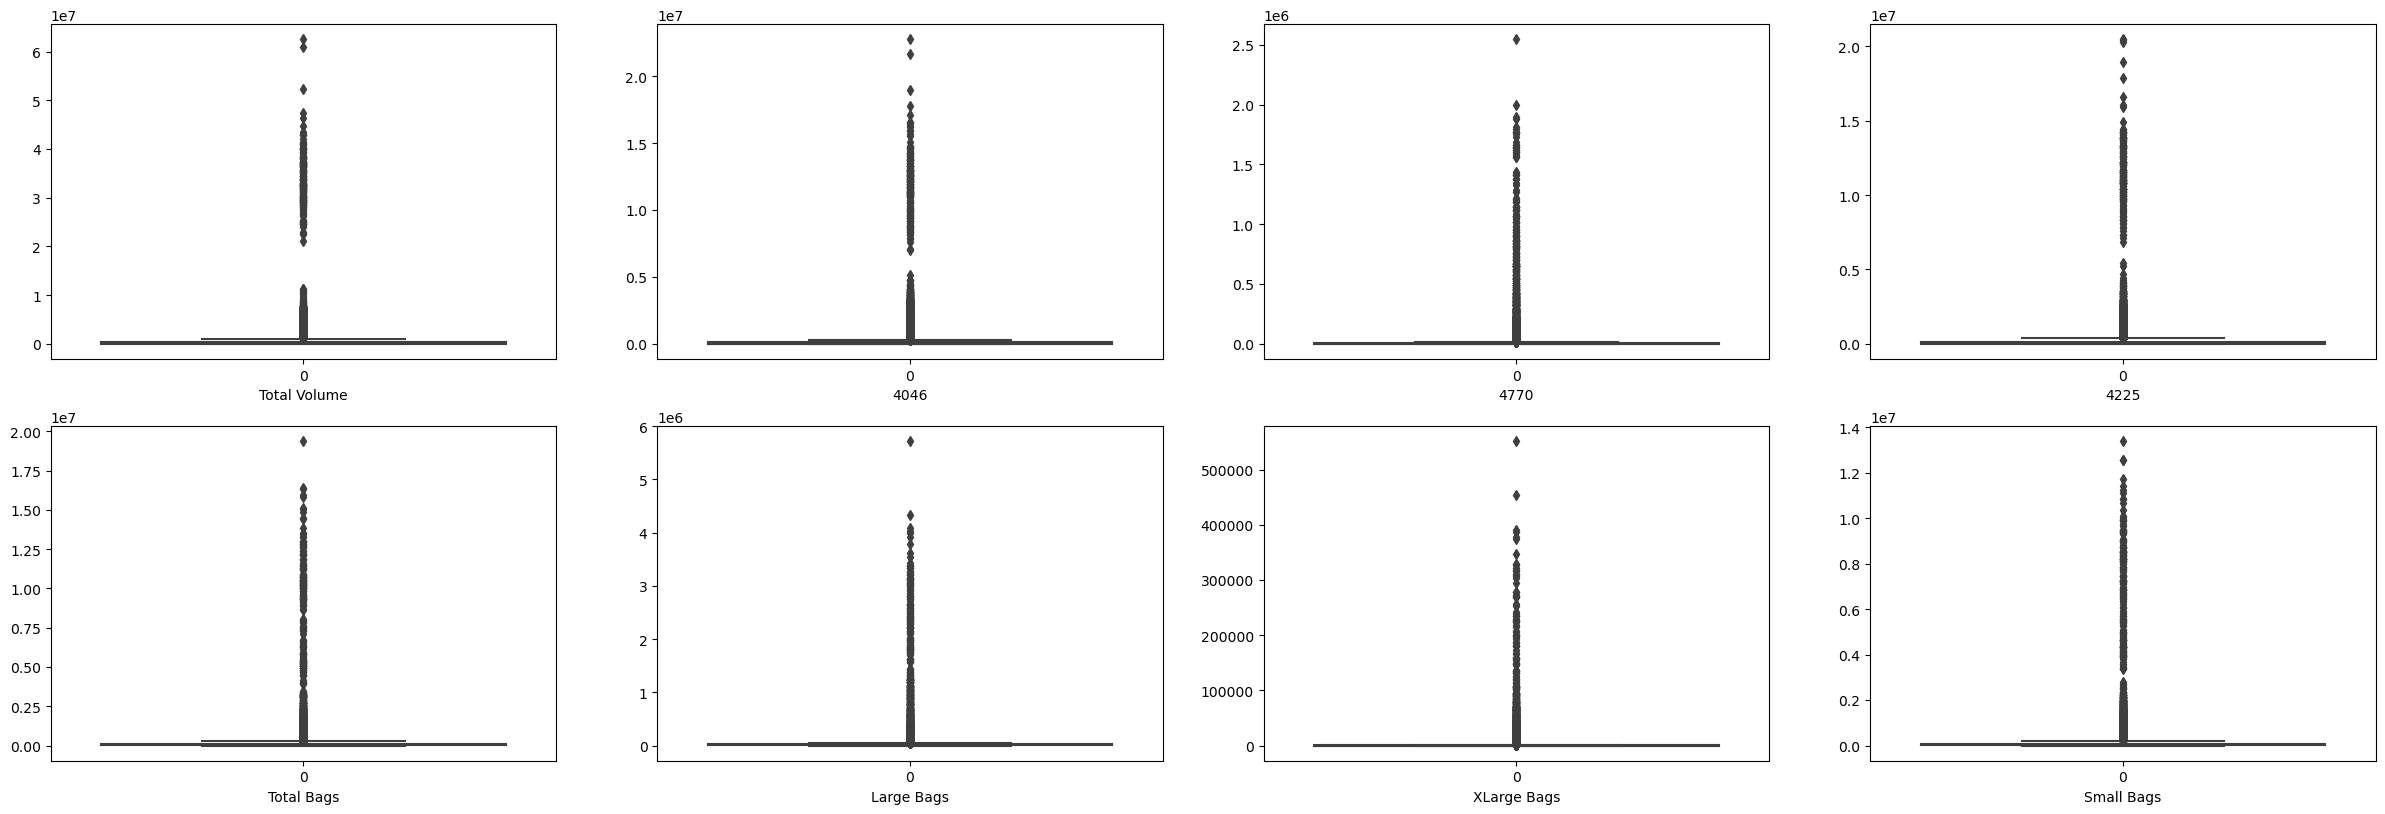

In [51]:
plt.figure(figsize=(30,20))
plotnumber=1
for i in data[continous]:
    plt.subplot(4,4,plotnumber)
    sns.boxplot(data[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

By analysing the data we can clearly see that this continous columns are full of outliers and we need to treat this
But the problem is that when we will delete these many outliers we may loose a large part of our quality data 
So we can also transform this But let us see by zscore that how many data points we will loose by this process

In [165]:
from scipy.stats import zscore

In [166]:
np.abs(zscore(data[continous]))

,Total Volume,4046,4770,4225,Total Bags,Large Bags,XLarge Bags,Small Bags
0,0.227716,0.230816,0.212091,0.199902,0.234170,0.222352,0.17558,0.232647
1,0.230427,0.231103,0.211997,0.208054,0.233350,0.222335,0.17558,0.231568
2,0.212085,0.231007,0.211325,0.154478,0.234730,0.222311,0.17558,0.233399
3,0.223444,0.230741,0.211864,0.185350,0.237096,0.222186,0.17558,0.236568
4,0.231538,0.230891,0.211834,0.208719,0.236718,0.221924,0.17558,0.236154
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.212540,0.243857,0.229301,0.220964,0.17558,0.226665
18245,0.242296,0.230693,0.212540,0.242277,0.233594,0.221403,0.17558,0.232196
18246,0.242331,0.230693,0.205766,0.243090,0.233463,0.222561,0.17558,0.231644
18247,0.241625,0.230428,0.205774,0.242651,0.231866,0.222529,0.17558,0.229543


In [167]:
index=np.where(np.abs(zscore(data[continous]))>3) #To see how many data points are beyond the 3 zscore level

In [168]:
len(index[0])

1642

In [169]:
((1642)/18249)*100

8.99775330155077

We will losse 8% data points by this process and we can afford to delete these many so we will delete this
Beyond the zscore of 3 the data points are considered to be outliers

In [170]:
data.drop(index=index[0],inplace=True)
data.reset_index(drop=True)
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,Year
0,1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,1,3,0,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,1,3,1,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,1,3,1,2015
3,2,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,1,3,2,2015
4,2,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,1,0,0,2015


In [172]:
data

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,Year
0,1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,1,3,0,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,1,3,1,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,1,3,1,2015
3,2,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,1,3,2,2015
4,2,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,1,0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,9,3,2,2018
18245,1,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,9,3,0,2018
18246,1,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,9,3,0,2018
18247,2,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,9,3,1,2018


In [60]:
#so we have succesfully treated the outliers
index=np.where(np.abs(zscore(data[continous]))>3)

In [61]:
#we will also transform the columnsas we will use these columns in the later process
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') #our data is strictly postive so we will use box-cox

In [62]:
transform=pt.fit_transform(data[continous])

In [63]:
transform=pd.DataFrame(transform,columns=continous)

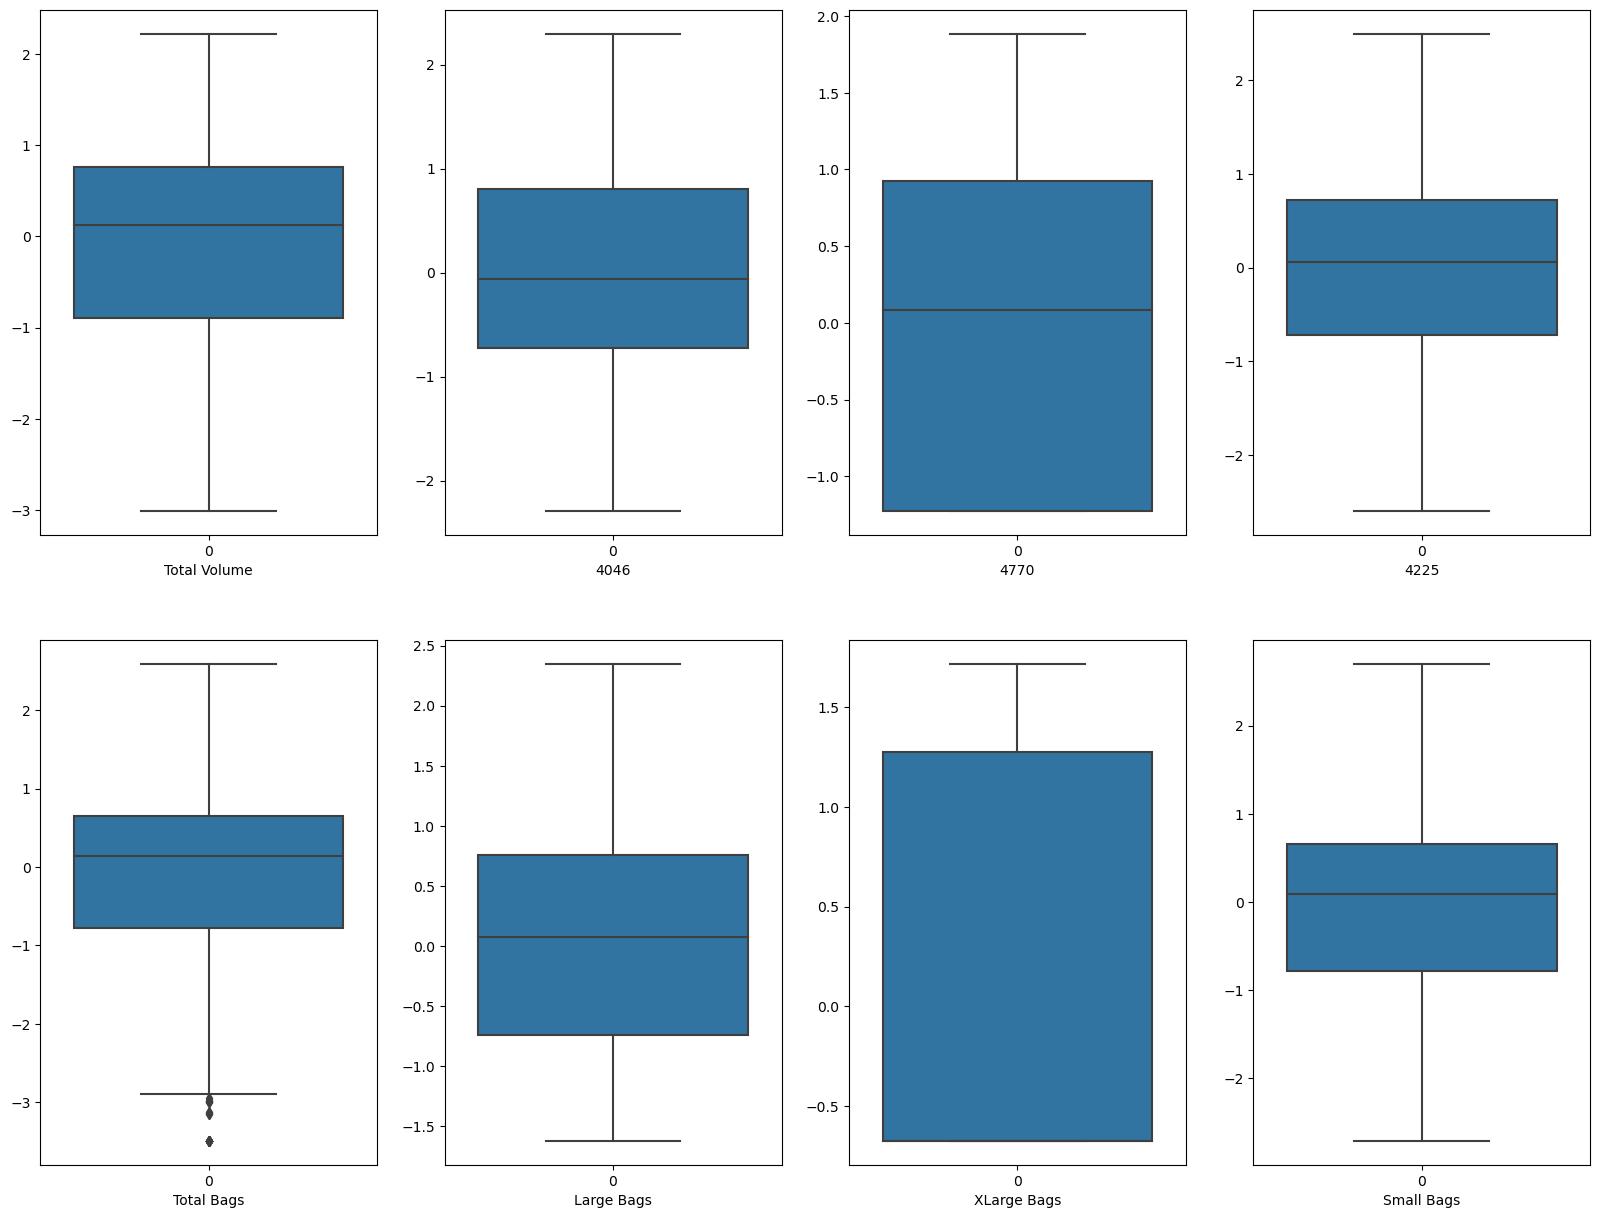

In [64]:
plt.figure(figsize=(20,15))
plotnumber=1
for i in transform:
    plt.subplot(2,4,plotnumber)
    sns.boxplot(transform[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

First of all we will make the model using the normal dataset after than we will also make the model using the transformed
dataset to see if there is any changes or not

In [65]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,Year
0,1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,1,3,0,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,1,3,1,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,1,3,1,2015
3,2,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,1,3,2,2015
4,2,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,1,0,0,2015


In [66]:
data.dtypes

Unnamed: 0        int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int64
Month             int32
Day               int32
Year              int32
dtype: object

Our model is ready and it good to go to make the model
So let us proceed
But before that let us first visualize the dataset

In [127]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,Year
0,1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,1,3,0,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,1,3,1,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,1,3,1,2015
3,2,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,1,3,2,2015
4,2,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,1,0,0,2015


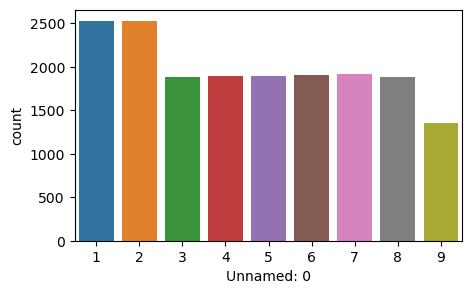

In [67]:
plt.figure(figsize=(5,3))
sns.countplot(x='Unnamed: 0',data=data)
plt.show()

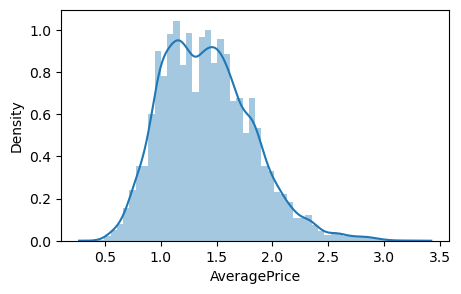

In [135]:
plt.figure(figsize=(5,3))
sns.distplot(data['AveragePrice'])
plt.show()

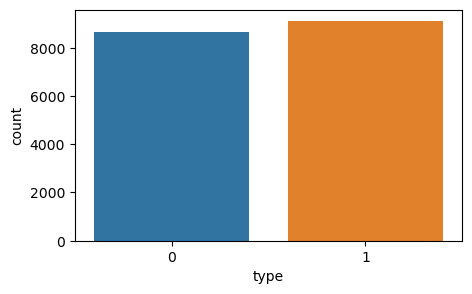

In [136]:
#Rest all the continous columns we have already visualized
plt.figure(figsize=(5,3))
sns.countplot(x='type',data=data)
plt.show()

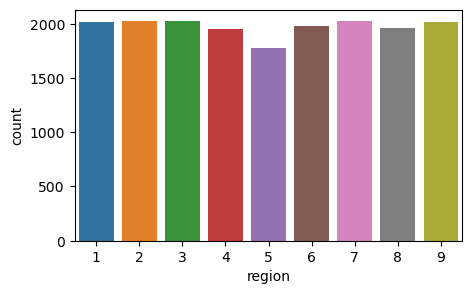

In [137]:
plt.figure(figsize=(5,3))
sns.countplot(x='region',data=data)
plt.show()

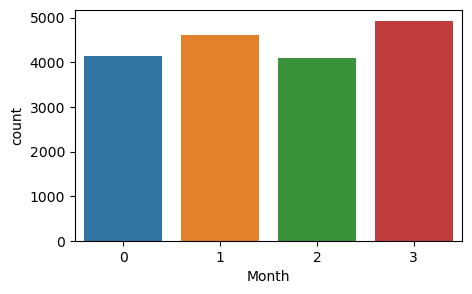

In [138]:
plt.figure(figsize=(5,3))
sns.countplot(x='Month',data=data)
plt.show()

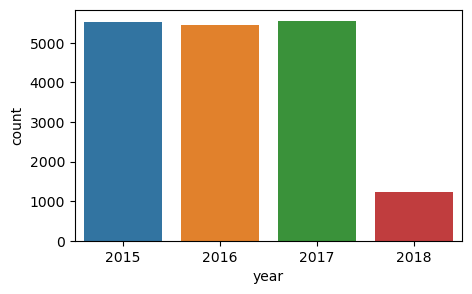

In [139]:
plt.figure(figsize=(5,3))
sns.countplot(x='year',data=data)
plt.show()

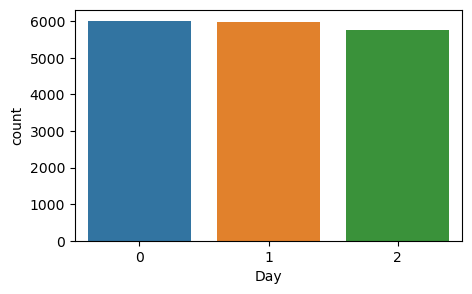

In [140]:
plt.figure(figsize=(5,3))
sns.countplot(x='Day',data=data)
plt.show()

In [141]:
#Now let us see the relation of all the columns with the labe
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,Year
0,1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,1,3,0,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,1,3,1,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,1,3,1,2015
3,2,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,1,3,2,2015
4,2,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,1,0,0,2015


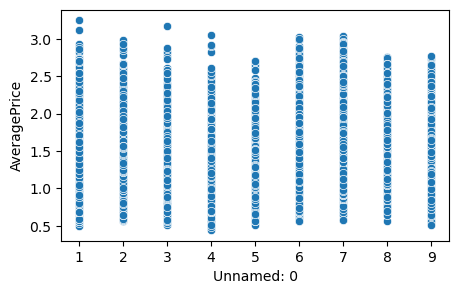

In [142]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='Unnamed: 0',y='AveragePrice',data=data)
plt.show()

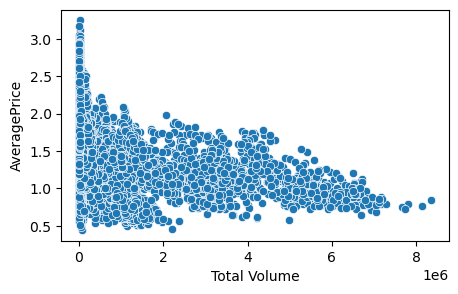

In [143]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='Total Volume',y='AveragePrice',data=data)
plt.show()

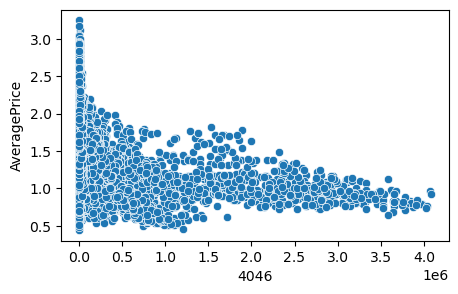

In [144]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='4046',y='AveragePrice',data=data)
plt.show()

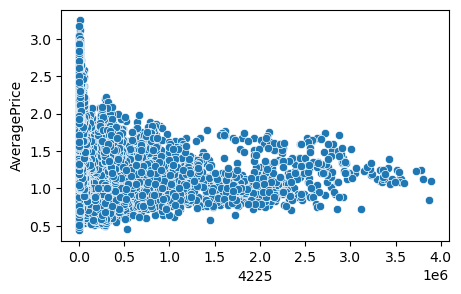

In [145]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='4225',y='AveragePrice',data=data)
plt.show()

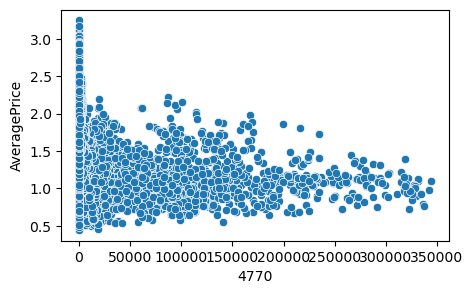

In [146]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='4770',y='AveragePrice',data=data)
plt.show()

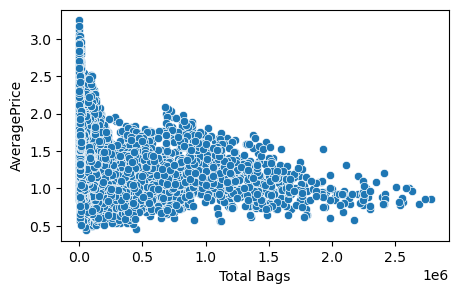

In [147]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='Total Bags',y='AveragePrice',data=data)
plt.show()

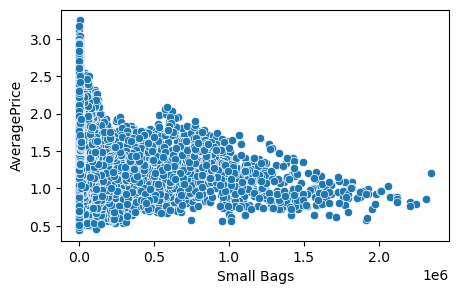

In [148]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='Small Bags',y='AveragePrice',data=data)
plt.show()

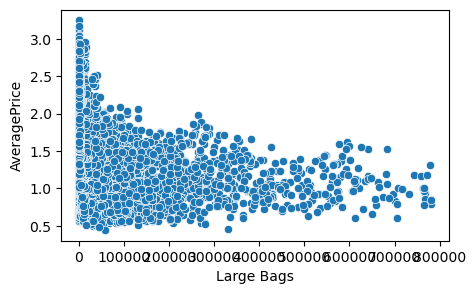

In [149]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='Large Bags',y='AveragePrice',data=data)
plt.show()

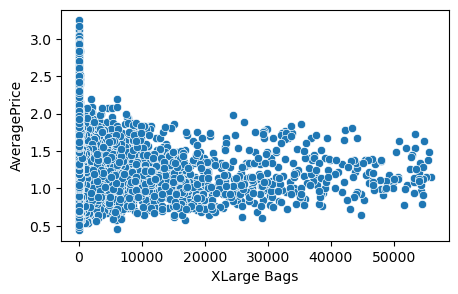

In [151]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='XLarge Bags',y='AveragePrice',data=data)
plt.show()

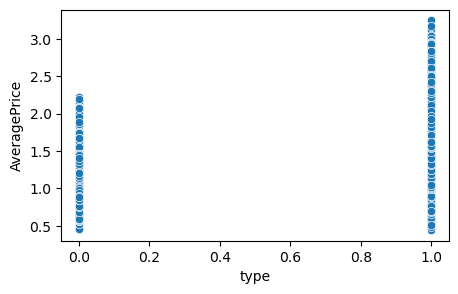

In [152]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='type',y='AveragePrice',data=data)
plt.show()

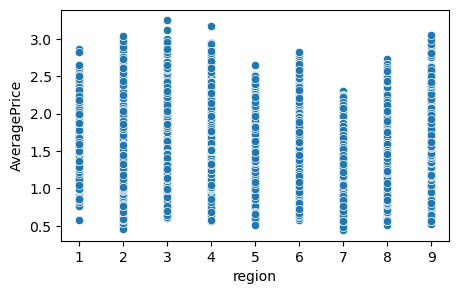

In [153]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='region',y='AveragePrice',data=data)
plt.show()

<Figure size 500x300 with 0 Axes>

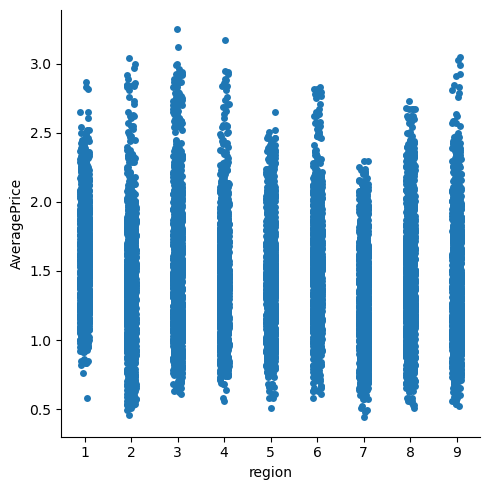

In [154]:
plt.figure(figsize=(5,3))
sns.catplot(x='region',y='AveragePrice',data=data)
plt.show()

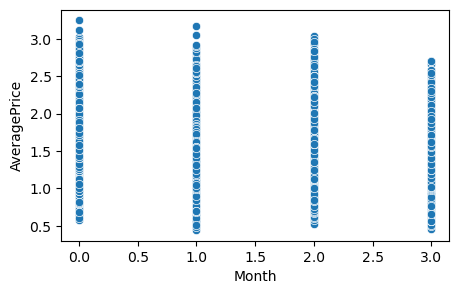

In [155]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='Month',y='AveragePrice',data=data)
plt.show()

<Figure size 500x300 with 0 Axes>

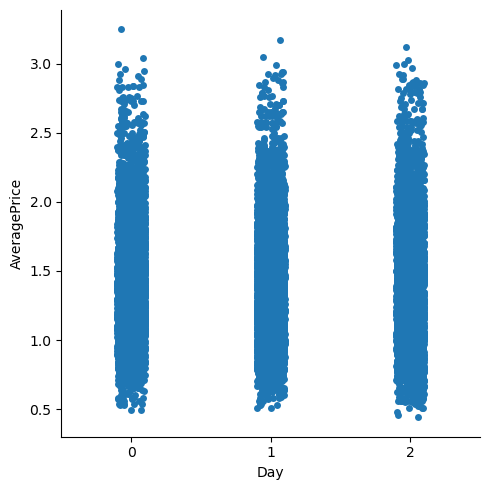

In [158]:
plt.figure(figsize=(5,3))
sns.catplot(x='Day',y='AveragePrice',data=data)
plt.show()

<Figure size 500x300 with 0 Axes>

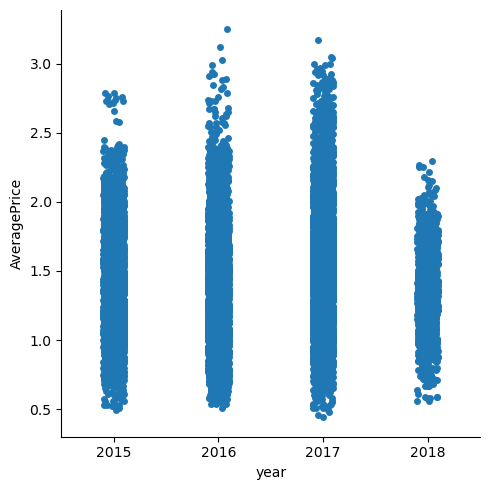

In [161]:
plt.figure(figsize=(5,3))
sns.catplot(x='year',y='AveragePrice',data=data)
plt.show()

So the visualization part is done now let us proceed to the model building phase where we will first standardize the data
and than we will select the best model based on the best r2 score 

In [162]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,Year
0,1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,1,3,0,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,1,3,1,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,1,3,1,2015
3,2,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,1,3,2,2015
4,2,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,1,0,0,2015


In [68]:
#standardization
from sklearn.preprocessing import StandardScaler

In [69]:
scaler=StandardScaler()

In [70]:
x=data.drop(columns='AveragePrice')
y=data['AveragePrice']

In [71]:
x_scaled=scaler.fit_transform(x.values)

In [72]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [75]:
x_scaled

,Unnamed: 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Day,Year
0,-1.407626,-0.389897,-0.348020,-0.276405,-0.320903,-0.427332,-0.399005,-0.378455,-0.258012,-1.026443,-1.532611,1.285958,-1.211387,-1.214908
1,-1.407626,-0.399166,-0.348847,-0.301078,-0.320607,-0.424457,-0.395490,-0.378397,-0.258012,-1.026443,-1.532611,1.285958,0.016994,-1.214908
2,-1.020123,-0.336431,-0.348572,-0.138931,-0.318507,-0.429293,-0.401459,-0.378319,-0.258012,-1.026443,-1.532611,1.285958,0.016994,-1.214908
3,-1.020123,-0.375283,-0.347803,-0.232365,-0.320192,-0.437592,-0.411794,-0.377898,-0.258012,-1.026443,-1.532611,1.285958,1.245374,-1.214908
4,-1.020123,-0.402967,-0.348237,-0.303089,-0.320099,-0.436266,-0.410444,-0.377020,-0.258012,-1.026443,-1.532611,-1.377837,-1.211387,-1.214908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,-1.407626,-0.436606,-0.345714,-0.409433,-0.322304,-0.410260,-0.379500,-0.373803,-0.258012,0.974238,1.539392,1.285958,1.245374,1.979143
17778,-1.407626,-0.439762,-0.347666,-0.404651,-0.322304,-0.425313,-0.397535,-0.375274,-0.258012,0.974238,1.539392,1.285958,-1.211387,1.979143
17779,-1.407626,-0.439882,-0.347666,-0.407111,-0.301126,-0.424853,-0.395736,-0.379155,-0.258012,0.974238,1.539392,1.285958,-1.211387,1.979143
17780,-1.020123,-0.437467,-0.346900,-0.405784,-0.301153,-0.419252,-0.388884,-0.379049,-0.258012,0.974238,1.539392,1.285958,0.016994,1.979143


This time we will not look at any variance or relation between the dataset we will just use all the columns and will
select the best model with this whole dataset

In [78]:
#Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV #ridge and the lassocv also act as a feature selector
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score    

In [79]:
# we will use the linearregression to check the best random state
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.47705857693308573 23


In [82]:
#so the max accuracy is 0.96 and best random state is 72
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=maxrs)

In [203]:
rr=RandomForestRegressor()
er=ExtraTreesRegressor()
lr=LinearRegression()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()
bg=BaggingRegressor()
ri=Ridge()
ls=LassoCV()
knn=KNeighborsRegressor()

In [204]:
models=[rr,er,lr,gb,ad,bg,ri,ls,knn]

In [176]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy

{RandomForestRegressor(): 0.8763078576281934,
 ExtraTreesRegressor(): 0.9076871794422796,
 LinearRegression(): 0.47705857693314047,
 GradientBoostingRegressor(): 0.7372510400600892,
 AdaBoostRegressor(): 0.5800609522087334,
 BaggingRegressor(): 0.8577950458486379,
 Ridge(): 0.4770791462684896,
 LassoCV(): 0.47694224460920687,
 KNeighborsRegressor(): 0.6153769097602166}

In [177]:
#so as of now extraTressRegressor has the best accuracy
#Let us see what happens after cross validation
from sklearn.model_selection import cross_val_score

In [178]:
for model in models:
    print(model,',',cross_val_score(model,x_scaled,y,cv=5).mean())

RandomForestRegressor() , 0.2342106638555655
ExtraTreesRegressor() , 0.24543631017258377
LinearRegression() , -12.074054021630836
GradientBoostingRegressor() , 0.3584526478611654
AdaBoostRegressor() , -0.062144584335598864
BaggingRegressor() , 0.2155955870281412
Ridge() , 0.11124060927017573
LassoCV() , 0.0886448988659646
KNeighborsRegressor() , 0.06308401589865979


So based on the accuracy and the cross validation the extra tree and the gradient boost are the best models
So let us do the tuning of these 

In [179]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

extra_tree = ExtraTreesRegressor()

grid_search = GridSearchCV(extra_tree, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [180]:
model=ExtraTreesRegressor(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,
                         min_samples_split=2,n_estimators=100)

In [181]:
model.fit(x_train,y_train)

ExtraTreesRegressor(max_features='sqrt')

In [182]:
pred=model.predict(x_test)

In [183]:
r2_score(y_test,pred)

0.8784517327745162

In [81]:
#Accuracy of the extratree regressor with full features
Accu_full_extratree=r2_score(y_test,pred)
Accu_full_extratree

0.8784517327745162

In [185]:
y_pred=model.predict(x_train)
r2_score(y_train,y_pred)

1.0

In [ ]:
#The model has 1.0 score for the train dataset

In [83]:
#Now let us look at the gradient boost which had the best accuracy while the cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

gradient_boost = GradientBoostingRegressor()

grid_search = GridSearchCV(gradient_boost, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [84]:
model=GradientBoostingRegressor(learning_rate=0.1,max_depth=5,max_features='sqrt',min_samples_leaf=2,
                               min_samples_split=2,n_estimators=100)

In [85]:
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [86]:
r2_score(y_test,pred)

0.8028979398782081

In [88]:
r2_full_score_gradient=r2_score(y_test,pred)
r2_full_score_gradient

0.8028979398782081

so as of now we have made the model using all the features and that without transformation
So now let us make the model using the transformed continous columns

In [173]:
data

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,Year
0,1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,1,3,0,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,1,3,1,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,1,3,1,2015
3,2,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,1,3,2,2015
4,2,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,1,0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,9,3,2,2018
18245,1,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,9,3,0,2018
18246,1,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,9,3,0,2018
18247,2,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,9,3,1,2018


In [174]:
data.reset_index(drop=True, inplace=True)

In [176]:
transform

,Total Volume,4046,4770,4225,Total Bags,Large Bags,XLarge Bags,Small Bags
0,-0.065094,-0.649918,-0.212550,0.358278,-0.527445,-0.775214,-0.675702,-0.337064
1,-0.137269,-0.770067,-0.165117,0.276355,-0.488205,-0.765237,-0.675702,-0.301038
2,0.215503,-0.724508,0.034215,0.656010,-0.556204,-0.752534,-0.675702,-0.364044
3,0.029840,-0.625017,-0.110976,0.475615,-0.702370,-0.693012,-0.675702,-0.500341
4,-0.170456,-0.677083,-0.100289,0.268966,-0.675712,-0.600755,-0.675702,-0.479918
...,...,...,...,...,...,...,...,...
17777,-0.668931,-0.454078,-1.224990,-0.922232,-0.331042,-0.405895,-0.675702,-0.165765
17778,-0.762380,-0.610403,-1.224990,-0.665649,-0.499550,-0.478556,-0.675702,-0.321645
17779,-0.766344,-0.610350,0.455355,-0.774395,-0.493424,-0.945246,-0.675702,-0.303466
17780,-0.692595,-0.539211,0.455045,-0.711605,-0.424475,-0.910471,-0.675702,-0.240252


In [177]:
np.where(np.abs(zscore(transform)>3))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
#We do not need to transform the data anymore as we have transformed the continous columns after deleting the outliers

In [187]:
pd.concat([data,transform],axis=1).isna().sum()

Unnamed: 0      0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
Month           0
Day             0
Year            0
Total Volume    0
4046            0
4770            0
4225            0
Total Bags      0
Large Bags      0
XLarge Bags     0
Small Bags      0
dtype: int64

In [188]:
#There are no nulls in the dataframe and can delete the continous columns and than add the transformed column
data=data.drop(columns=continous)
data

,Unnamed: 0,AveragePrice,type,region,Month,Day,Year
0,1,1.33,0,1,3,0,2015
1,1,1.35,0,1,3,1,2015
2,2,0.93,0,1,3,1,2015
3,2,1.08,0,1,3,2,2015
4,2,1.28,0,1,0,0,2015
...,...,...,...,...,...,...,...
17777,1,1.63,1,9,3,2,2018
17778,1,1.71,1,9,3,0,2018
17779,1,1.87,1,9,3,0,2018
17780,2,1.93,1,9,3,1,2018


In [190]:
data=pd.concat([data,transform],axis=1)

In [192]:
data.head()

,Unnamed: 0,AveragePrice,type,region,Month,Day,Year,Total Volume,4046,4770,4225,Total Bags,Large Bags,XLarge Bags,Small Bags
0,1,1.33,0,1,3,0,2015,-0.065094,-0.649918,-0.212550,0.358278,-0.527445,-0.775214,-0.675702,-0.337064
1,1,1.35,0,1,3,1,2015,-0.137269,-0.770067,-0.165117,0.276355,-0.488205,-0.765237,-0.675702,-0.301038
2,2,0.93,0,1,3,1,2015,0.215503,-0.724508,0.034215,0.656010,-0.556204,-0.752534,-0.675702,-0.364044
3,2,1.08,0,1,3,2,2015,0.029840,-0.625017,-0.110976,0.475615,-0.702370,-0.693012,-0.675702,-0.500341
4,2,1.28,0,1,0,0,2015,-0.170456,-0.677083,-0.100289,0.268966,-0.675712,-0.600755,-0.675702,-0.479918


In [195]:
data.isna().sum()

Unnamed: 0      0
AveragePrice    0
type            0
region          0
Month           0
Day             0
Year            0
Total Volume    0
4046            0
4770            0
4225            0
Total Bags      0
Large Bags      0
XLarge Bags     0
Small Bags      0
dtype: int64

In [194]:
x=data.drop(columns='AveragePrice')
y=data['AveragePrice']

In [196]:
x_scaled=scaler.fit_transform(x.values)

In [197]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [199]:
x_scaled

,Unnamed: 0,type,region,Month,Day,Year,Total Volume,4046,4770,4225,Total Bags,Large Bags,XLarge Bags,Small Bags
0,-1.407626,-1.026443,-1.532611,1.285958,-1.211387,-1.214908,-0.065094,-0.649918,-0.212550,0.358278,-0.527445,-0.775214,-0.675702,-0.337064
1,-1.407626,-1.026443,-1.532611,1.285958,0.016994,-1.214908,-0.137269,-0.770067,-0.165117,0.276355,-0.488205,-0.765237,-0.675702,-0.301038
2,-1.020123,-1.026443,-1.532611,1.285958,0.016994,-1.214908,0.215503,-0.724508,0.034215,0.656010,-0.556204,-0.752534,-0.675702,-0.364044
3,-1.020123,-1.026443,-1.532611,1.285958,1.245374,-1.214908,0.029840,-0.625017,-0.110976,0.475615,-0.702370,-0.693012,-0.675702,-0.500341
4,-1.020123,-1.026443,-1.532611,-1.377837,-1.211387,-1.214908,-0.170456,-0.677083,-0.100289,0.268966,-0.675712,-0.600755,-0.675702,-0.479918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,-1.407626,0.974238,1.539392,1.285958,1.245374,1.979143,-0.668931,-0.454078,-1.224990,-0.922232,-0.331042,-0.405895,-0.675702,-0.165765
17778,-1.407626,0.974238,1.539392,1.285958,-1.211387,1.979143,-0.762380,-0.610403,-1.224990,-0.665649,-0.499550,-0.478556,-0.675702,-0.321645
17779,-1.407626,0.974238,1.539392,1.285958,-1.211387,1.979143,-0.766344,-0.610350,0.455355,-0.774395,-0.493424,-0.945246,-0.675702,-0.303466
17780,-1.020123,0.974238,1.539392,1.285958,0.016994,1.979143,-0.692595,-0.539211,0.455045,-0.711605,-0.424475,-0.910471,-0.675702,-0.240252


This time also we are not worrying about variance and coorelation between the columns

The libraries have already been imported now we will just check the score for our new x_scaled

In [200]:
# we will use the linearregression to check the best random state
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.5916050227555822 159


In [201]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=maxrs)

In [205]:
#The models have already been defined now we just need to check the score
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy

{RandomForestRegressor(): 0.8775778544542973,
 ExtraTreesRegressor(): 0.9053687540932193,
 LinearRegression(): 0.5916050227555822,
 GradientBoostingRegressor(): 0.7381454492449192,
 AdaBoostRegressor(): 0.5925468715603344,
 BaggingRegressor(): 0.8604848038400631,
 Ridge(): 0.5915929209445188,
 LassoCV(): 0.5913683394768794,
 KNeighborsRegressor(): 0.7562665048740929}

In [ ]:
#SO there has been a difference in the scores now let us look at the cross validation

In [207]:
for model in models:
    print(model,',',cross_val_score(model,x_scaled,y,cv=5).mean())

RandomForestRegressor() , 0.24016527030234563
ExtraTreesRegressor() , 0.2998283832340101
LinearRegression() , 0.2524434821917893
GradientBoostingRegressor() , 0.3580543266991826
AdaBoostRegressor() , -0.016564955364383162
BaggingRegressor() , 0.21344917758484253
Ridge() , 0.25241826888955077
LassoCV() , 0.25228761952040024
KNeighborsRegressor() , 0.1704419228439233


The best model again is the extra tree so let us do the tuning for this now

In [211]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

param_grid = {
    'n_estimators': [50,100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

extra_tree = ExtraTreesRegressor()

grid_search = GridSearchCV(extra_tree, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [212]:
model=ExtraTreesRegressor(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,
                         min_samples_split=2,n_estimators=130)

In [213]:
model.fit(x_train,y_train)

ExtraTreesRegressor(max_features='sqrt', n_estimators=130)

In [214]:
pred=model.predict(x_test)
r2_score(y_test,pred)

0.8801356953260866

Here  the r2 score is 0.88

In [215]:
r2_score_transform_extratree=0.880135

Let us do this by considering the variance inflation factor and deleting the columns in that way

In [216]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [218]:
for i in range(14):
    print(x_scaled.columns[i])
    print(variance_inflation_factor(x_scaled,i))
    print('                                ')

Unnamed: 0
1.0864214414379365
                                
type
3.691759435400242
                                
region
1.0318782216856537
                                
Month
1.0505134969060037
                                
Day
1.011901395638547
                                
Year
1.3938496005045138
                                
Total Volume
51.80118554533759
                                
4046
6.825658417502569
                                
4770
3.950098802775602
                                
4225
11.227962005373366
                                
Total Bags
34.48161939444909
                                
Large Bags
3.5271577398590437
                                
XLarge Bags
2.0699333611642334
                                
Small Bags
16.6720493445764
                                


In [220]:
x_scaled

,Unnamed: 0,type,region,Month,Day,Year,4046,4770,4225,Total Bags,Large Bags,XLarge Bags,Small Bags
0,-1.407626,-1.026443,-1.532611,1.285958,-1.211387,-1.214908,-0.649918,-0.212550,0.358278,-0.527445,-0.775214,-0.675702,-0.337064
1,-1.407626,-1.026443,-1.532611,1.285958,0.016994,-1.214908,-0.770067,-0.165117,0.276355,-0.488205,-0.765237,-0.675702,-0.301038
2,-1.020123,-1.026443,-1.532611,1.285958,0.016994,-1.214908,-0.724508,0.034215,0.656010,-0.556204,-0.752534,-0.675702,-0.364044
3,-1.020123,-1.026443,-1.532611,1.285958,1.245374,-1.214908,-0.625017,-0.110976,0.475615,-0.702370,-0.693012,-0.675702,-0.500341
4,-1.020123,-1.026443,-1.532611,-1.377837,-1.211387,-1.214908,-0.677083,-0.100289,0.268966,-0.675712,-0.600755,-0.675702,-0.479918
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,-1.407626,0.974238,1.539392,1.285958,1.245374,1.979143,-0.454078,-1.224990,-0.922232,-0.331042,-0.405895,-0.675702,-0.165765
17778,-1.407626,0.974238,1.539392,1.285958,-1.211387,1.979143,-0.610403,-1.224990,-0.665649,-0.499550,-0.478556,-0.675702,-0.321645
17779,-1.407626,0.974238,1.539392,1.285958,-1.211387,1.979143,-0.610350,0.455355,-0.774395,-0.493424,-0.945246,-0.675702,-0.303466
17780,-1.020123,0.974238,1.539392,1.285958,0.016994,1.979143,-0.539211,0.455045,-0.711605,-0.424475,-0.910471,-0.675702,-0.240252


In [221]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.5814918092108446 159


In [222]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=maxrs)

In [224]:
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

extra_tree = ExtraTreesRegressor()

grid_search = GridSearchCV(extra_tree, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [229]:
model=ExtraTreesRegressor(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,
                         n_estimators=100)

In [230]:
model.fit(x_train,y_train)

ExtraTreesRegressor(max_features='sqrt')

In [231]:
pred=model.predict(x_test)

In [232]:
r2_score(y_test,pred)

0.8750133008078749

so now the model is having an r2 score of 0.87 which is less than before

Let us try anothe thing we will use the pca and will transform the data using this
we will use the full features without deleting anything

In [235]:
x=data.drop(columns='AveragePrice')
y=data['AveragePrice']

In [236]:
x_scaled=scaler.fit_transform(x.values)

In [237]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [238]:
x_scaled

,Unnamed: 0,type,region,Month,Day,Year,Total Volume,4046,4770,4225,Total Bags,Large Bags,XLarge Bags,Small Bags
0,-1.407626,-1.026443,-1.532611,1.285958,-1.211387,-1.214908,-0.065094,-0.649918,-0.212550,0.358278,-0.527445,-0.775214,-0.675702,-0.337064
1,-1.407626,-1.026443,-1.532611,1.285958,0.016994,-1.214908,-0.137269,-0.770067,-0.165117,0.276355,-0.488205,-0.765237,-0.675702,-0.301038
2,-1.020123,-1.026443,-1.532611,1.285958,0.016994,-1.214908,0.215503,-0.724508,0.034215,0.656010,-0.556204,-0.752534,-0.675702,-0.364044
3,-1.020123,-1.026443,-1.532611,1.285958,1.245374,-1.214908,0.029840,-0.625017,-0.110976,0.475615,-0.702370,-0.693012,-0.675702,-0.500341
4,-1.020123,-1.026443,-1.532611,-1.377837,-1.211387,-1.214908,-0.170456,-0.677083,-0.100289,0.268966,-0.675712,-0.600755,-0.675702,-0.479918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,-1.407626,0.974238,1.539392,1.285958,1.245374,1.979143,-0.668931,-0.454078,-1.224990,-0.922232,-0.331042,-0.405895,-0.675702,-0.165765
17778,-1.407626,0.974238,1.539392,1.285958,-1.211387,1.979143,-0.762380,-0.610403,-1.224990,-0.665649,-0.499550,-0.478556,-0.675702,-0.321645
17779,-1.407626,0.974238,1.539392,1.285958,-1.211387,1.979143,-0.766344,-0.610350,0.455355,-0.774395,-0.493424,-0.945246,-0.675702,-0.303466
17780,-1.020123,0.974238,1.539392,1.285958,0.016994,1.979143,-0.692595,-0.539211,0.455045,-0.711605,-0.424475,-0.910471,-0.675702,-0.240252


In [239]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.5916050227555822 159


In [240]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=maxrs)

In [242]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Retain components that explain 95% of the variance

In [245]:
x_train = pca.fit_transform(x_train)
x_test= pca.transform(x_test)

We will use different pca values and wil check for the accuracy
This is our final try after that we will proceed to the classification part

In [246]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy

{RandomForestRegressor(): 0.7416211801198282,
 ExtraTreesRegressor(): 0.7659320460754069,
 LinearRegression(): 0.45026129296533546,
 GradientBoostingRegressor(): 0.5923017448049902,
 AdaBoostRegressor(): 0.4722075367591181,
 BaggingRegressor(): 0.7115000602362359,
 Ridge(): 0.45025954876638696,
 LassoCV(): 0.45012087550736823,
 KNeighborsRegressor(): 0.6879025935049485}

In [ ]:
#we will do the tuning of the best model we will get here
#Till now the best model for this regression has been extra tree

Here the pca is not helping because the accuracy has decreased while we were expecting it to increase
Let us do the tuning before making any conclusion

In [248]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
# Create an ExtraTreeRegressor instance
extra_tree = ExtraTreesRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(extra_tree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [249]:
model=ExtraTreesRegressor(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,
                         n_estimators=100)

In [250]:
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [251]:
r2_score(y_test,pred)

0.7462084652511376

So we can clearly see that there is no betterement in the performance of the model

In [254]:
for i in range(14):
    print(x_scaled.columns[i])
    print(variance_inflation_factor(x_scaled,i))
    print('        ')

Unnamed: 0
1.0864214414379365
        
type
3.691759435400242
        
region
1.0318782216856537
        
Month
1.0505134969060037
        
Day
1.011901395638547
        
Year
1.3938496005045138
        
Total Volume
51.80118554533759
        
4046
6.825658417502569
        
4770
3.950098802775602
        
4225
11.227962005373366
        
Total Bags
34.48161939444909
        
Large Bags
3.5271577398590437
        
XLarge Bags
2.0699333611642334
        
Small Bags
16.6720493445764
        


In [258]:
x_scaled

,Unnamed: 0,type,region,Month,Day,Year,4046,4770,4225,Large Bags,XLarge Bags
0,-1.407626,-1.026443,-1.532611,1.285958,-1.211387,-1.214908,-0.649918,-0.212550,0.358278,-0.775214,-0.675702
1,-1.407626,-1.026443,-1.532611,1.285958,0.016994,-1.214908,-0.770067,-0.165117,0.276355,-0.765237,-0.675702
2,-1.020123,-1.026443,-1.532611,1.285958,0.016994,-1.214908,-0.724508,0.034215,0.656010,-0.752534,-0.675702
3,-1.020123,-1.026443,-1.532611,1.285958,1.245374,-1.214908,-0.625017,-0.110976,0.475615,-0.693012,-0.675702
4,-1.020123,-1.026443,-1.532611,-1.377837,-1.211387,-1.214908,-0.677083,-0.100289,0.268966,-0.600755,-0.675702
...,...,...,...,...,...,...,...,...,...,...,...
17777,-1.407626,0.974238,1.539392,1.285958,1.245374,1.979143,-0.454078,-1.224990,-0.922232,-0.405895,-0.675702
17778,-1.407626,0.974238,1.539392,1.285958,-1.211387,1.979143,-0.610403,-1.224990,-0.665649,-0.478556,-0.675702
17779,-1.407626,0.974238,1.539392,1.285958,-1.211387,1.979143,-0.610350,0.455355,-0.774395,-0.945246,-0.675702
17780,-1.020123,0.974238,1.539392,1.285958,0.016994,1.979143,-0.539211,0.455045,-0.711605,-0.910471,-0.675702


In [259]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.5277655083182968 159


In [260]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=maxrs)

In [261]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
# Create an ExtraTreeRegressor instance
extra_tree = ExtraTreesRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(extra_tree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [262]:
model=ExtraTreesRegressor(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,
                         n_estimators=100)

In [263]:
model.fit(x_train,y_train)

ExtraTreesRegressor(max_features='sqrt')

In [264]:
r2_score(y_test,model.predict(x_test))

0.8527679730348339

In [265]:
r2_score(y_train,model.predict(x_train))

1.0

#This time also there is no improvement in the score. Now our model building is over and we will give the final conclusions

In [267]:
#Let us make another model by using the best features selected using the selectkbest

In [269]:
x

,Unnamed: 0,type,region,Month,Day,Year,Total Volume,4046,4770,4225,Total Bags,Large Bags,XLarge Bags,Small Bags
0,1,0,1,3,0,2015,-0.065094,-0.649918,-0.212550,0.358278,-0.527445,-0.775214,-0.675702,-0.337064
1,1,0,1,3,1,2015,-0.137269,-0.770067,-0.165117,0.276355,-0.488205,-0.765237,-0.675702,-0.301038
2,2,0,1,3,1,2015,0.215503,-0.724508,0.034215,0.656010,-0.556204,-0.752534,-0.675702,-0.364044
3,2,0,1,3,2,2015,0.029840,-0.625017,-0.110976,0.475615,-0.702370,-0.693012,-0.675702,-0.500341
4,2,0,1,0,0,2015,-0.170456,-0.677083,-0.100289,0.268966,-0.675712,-0.600755,-0.675702,-0.479918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,1,1,9,3,2,2018,-0.668931,-0.454078,-1.224990,-0.922232,-0.331042,-0.405895,-0.675702,-0.165765
17778,1,1,9,3,0,2018,-0.762380,-0.610403,-1.224990,-0.665649,-0.499550,-0.478556,-0.675702,-0.321645
17779,1,1,9,3,0,2018,-0.766344,-0.610350,0.455355,-0.774395,-0.493424,-0.945246,-0.675702,-0.303466
17780,2,1,9,3,1,2018,-0.692595,-0.539211,0.455045,-0.711605,-0.424475,-0.910471,-0.675702,-0.240252


In [271]:
from sklearn.feature_selection  import SelectKBest,f_classif

In [272]:
selectkbest=SelectKBest(score_func=f_classif,k=10)

In [273]:
selectkbest.fit(x,y)

SelectKBest()

In [274]:
selectkbest.scores_

array([ 1.37435205, 49.96616815,  2.50364585,  2.86077914,  1.2821729 ,
        3.16353911, 39.92725024, 36.48018063, 27.65110082, 21.77285344,
       35.87912396, 23.35474663, 15.06535329, 25.03995144])

In [275]:
x.columns

Index(['Unnamed: 0', 'type', 'region', 'Month', 'Day', 'Year', 'Total Volume',
       '4046', '4770', '4225', 'Total Bags', 'Large Bags', 'XLarge Bags',
       'Small Bags'],
      dtype='object')

In [279]:
df_scores=pd.DataFrame(selectkbest.scores_)
df_cols=pd.DataFrame(x.columns)
feature_scores=pd.concat([df_scores,df_cols],axis=1)
feature_scores.columns=['score','columns']

In [280]:
feature_scores

,score,columns
0,1.374352,Unnamed: 0
1,49.966168,type
2,2.503646,region
3,2.860779,Month
4,1.282173,Day
5,3.163539,Year
6,39.927250,Total Volume
7,36.480181,4046
8,27.651101,4770
9,21.772853,4225


In [283]:
feature_scores.nlargest(10,'score')

,score,columns
1,49.966168,type
6,39.927250,Total Volume
7,36.480181,4046
10,35.879124,Total Bags
8,27.651101,4770
13,25.039951,Small Bags
11,23.354747,Large Bags
9,21.772853,4225
12,15.065353,XLarge Bags
5,3.163539,Year


In [291]:
x=data[['type','Total Volume','4046','Total Bags','4770','Small Bags','Large Bags','4225','XLarge Bags','Year']]

In [287]:

y=data['AveragePrice']

In [292]:
x_scaled=scaler.fit_transform(x.values)

In [293]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [294]:
x_scaled

,type,Total Volume,4046,Total Bags,4770,Small Bags,Large Bags,4225,XLarge Bags,Year
0,-1.026443,-0.065094,-0.649918,-0.527445,-0.212550,-0.337064,-0.775214,0.358278,-0.675702,-1.214908
1,-1.026443,-0.137269,-0.770067,-0.488205,-0.165117,-0.301038,-0.765237,0.276355,-0.675702,-1.214908
2,-1.026443,0.215503,-0.724508,-0.556204,0.034215,-0.364044,-0.752534,0.656010,-0.675702,-1.214908
3,-1.026443,0.029840,-0.625017,-0.702370,-0.110976,-0.500341,-0.693012,0.475615,-0.675702,-1.214908
4,-1.026443,-0.170456,-0.677083,-0.675712,-0.100289,-0.479918,-0.600755,0.268966,-0.675702,-1.214908
...,...,...,...,...,...,...,...,...,...,...
17777,0.974238,-0.668931,-0.454078,-0.331042,-1.224990,-0.165765,-0.405895,-0.922232,-0.675702,1.979143
17778,0.974238,-0.762380,-0.610403,-0.499550,-1.224990,-0.321645,-0.478556,-0.665649,-0.675702,1.979143
17779,0.974238,-0.766344,-0.610350,-0.493424,0.455355,-0.303466,-0.945246,-0.774395,-0.675702,1.979143
17780,0.974238,-0.692595,-0.539211,-0.424475,0.455045,-0.240252,-0.910471,-0.711605,-0.675702,1.979143


In [296]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.5417632995928212 99


In [297]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=maxrs)

In [298]:
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy

{RandomForestRegressor(): 0.8018364085680739,
 ExtraTreesRegressor(): 0.8281194920604141,
 LinearRegression(): 0.5417632995928212,
 GradientBoostingRegressor(): 0.6564945495717913,
 AdaBoostRegressor(): 0.4867652367356755,
 BaggingRegressor(): 0.7784158321519573,
 Ridge(): 0.5417697240371169,
 LassoCV(): 0.5417341009780101,
 KNeighborsRegressor(): 0.7880858361663927}

This is our final try

In [301]:
#Again the extra tree is the best model so we will do the tuning for this only
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
# Create an ExtraTreeRegressor instance
extra_tree = ExtraTreesRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(extra_tree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [302]:
model=ExtraTreesRegressor(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,
                         min_samples_split=2,n_estimators=100)

In [303]:
model.fit(x_train,y_train)

ExtraTreesRegressor(max_features='sqrt')

In [304]:
r2_score(y_test,model.predict(x_test))

0.8230340992812242

In [ ]:
#So there is no improvement in the model performance

Final conclusions for the regression part of the project-
We made many model and with many features and with many combinations. The extra tree regressor was the best performer in most of the model and in most of the features combination.
The best model with best accuracy was the extra tree regressor with all the features. We used the transformed set of continous
columns i this model and we did this transformation with the help of yea_johnson transformation and afer treating the outliers
of the continous columns in the dataset.We ignored all the multicollinearity between the columns in this combination and the
vif scores also.This model had an r2 score of 0.89 after tuning which was our best score. The r2 score on the train set was exactly 1.0 for this model. When we considered the vif scores and the multicollinearity the scores were descreasing for the models.
Thanks sir
Now we have to proceed to the classification part.

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,Year
0,1,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,1,3,0,2015
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,1,3,1,2015
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,1,3,1,2015
3,2,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,1,3,2,2015
4,2,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,1,0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,9,3,2,2018
18245,1,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,9,3,0,2018
18246,1,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,9,3,0,2018
18247,2,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,9,3,1,2018


In [317]:
data=pd.read_csv("C:\\Users\\vipul\\OneDrive\\Documents\\datatrained\\avocado.csv")
#For the classification part of the problem

In [309]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [311]:
data_copy.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,Year
0,1,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,1,3,0,2015
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,1,3,1,2015
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,1,3,1,2015
3,2,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,1,3,2,2015
4,2,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,1,0,0,2015


In [312]:
data['region'].value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

#there are 54 unique values so we will make 2 types of model one  considering all the 54 labels and one considering
9 lables which we have grouped

In [313]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [322]:
def unnamed(value):
    if value in region[:6]:
        return 1
    if value in region[6:12]:
        return 2
    if value in region[12:18]:
        return 3
    if value in region[18:24]:
        return 4
    if value in region[24:30]:
        return 5
    if value in region[30:36]:
        return 6
    if value in region[36:42]:
        return 7
    if value in region[42:48]:
        return 8
    if value in region[48:]:
        return 9

In [323]:
data['Unnamed: 0']=data['Unnamed: 0'].apply(unnamed)

In [324]:
data['Unnamed: 0'].value_counts()

Unnamed: 0
1    2592
2    2592
6    1944
7    1944
8    1944
5    1944
3    1944
4    1944
9    1401
Name: count, dtype: int64

In [325]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [326]:
#the date column
data['Date']=pd.to_datetime(data['Date'])

In [327]:
data['year']=data['Date'].dt.year

In [328]:
data['month']=data['Date'].dt.month
data['day']=data['Date'].dt.day

In [329]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [330]:
data=data.drop(columns='Date')
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [331]:
#let subdivide into summer , winter, spring and autumn
def month(value):
    if value in (3,4,5):
        return 'spring'
    if value in (6,7,8):
        return 'summer'
    if value in (9,10,11):
        return 'autumn'
    if value in (12,1,2):
        return 'winter'

In [332]:
data['month']=data['month'].apply(month)

In [333]:
data['month'].value_counts()

month
winter    5075
spring    4752
autumn    4212
summer    4210
Name: count, dtype: int64

In [334]:
data['day'].value_counts()

day
4     756
11    756
18    755
25    755
1     648
26    648
5     648
12    648
3     648
8     648
15    648
22    648
24    648
17    648
10    648
19    648
7     540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
6     539
2     432
9     432
23    432
30    432
31    432
16    432
Name: count, dtype: int64

In [335]:
#we can divide the day into start , end and the middle of them month
def day(value):
    if value in list(range(1,11)):
        return 'start of month'
    if value in list(range(11,21)):
        return 'middle of month'
    if value in list(range(21,32)):
        return 'end of month'

In [336]:
data['day']=data['day'].apply(day)

In [337]:
data['day'].value_counts()

day
end of month       6155
middle of month    6155
start of month     5939
Name: count, dtype: int64

In [338]:
#now let us encode the columns also
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
data['day']=lab_enc.fit_transform(data['day'])

In [339]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,winter,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,winter,1
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,winter,1
3,2,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,winter,2
4,2,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,autumn,0


In [340]:
data['month']=lab_enc.fit_transform(data['month'])

In [341]:
data['month'].value_counts()

month
3    5075
1    4752
0    4212
2    4210
Name: count, dtype: int64

In [342]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,3,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,3,1
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,3,1
3,2,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,3,2
4,2,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,0,0


In [344]:
data['year']=lab_enc.fit_transform(data['year'])

In [345]:
data['year'].value_counts()

year
2    5722
1    5616
0    5615
3    1296
Name: count, dtype: int64

In [346]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,0,Albany,3,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,0,Albany,3,1
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,0,Albany,3,1
3,2,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,0,Albany,3,2
4,2,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,0,Albany,0,0


In [347]:
data['type']=lab_enc.fit_transform(data['type'])

In [348]:
data['type'].value_counts()

type
0    9126
1    9123
Name: count, dtype: int64

In [349]:
data['region'].value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

In [350]:
#At first we will make the model using all the label so now we will not group them
data['region']=lab_enc.fit_transform(data['region'])
data['region'].value_counts()

region
0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: count, dtype: int64

In [351]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0,3,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0,3,1
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0,3,1
3,2,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0,3,2
4,2,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0,0,0


Encoding done now let us treat the outliers like we treated in the regression part

In [353]:
from scipy.stats import zscore

In [357]:
index=np.where(np.abs(zscore(data[continous])>3))

In [359]:
len(index[0])

1642

In [361]:
data=data.drop(index=index[0])

In [364]:
data.reset_index(drop=True,inplace=True)

I will make two models one with transformed dataset and one with the normal

In [ ]:
#firs let us make the model with the normal dataset

In [365]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0,3,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0,3,1
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0,3,1
3,2,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0,3,2
4,2,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0,0,0


In [366]:
x=data.drop(columns='region')
y=data['region']

In [367]:
x_scaled=scaler.fit_transform(x.values)

In [368]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,month,day
0,-1.407626,-0.212660,-0.389897,-0.348020,-0.276405,-0.320903,-0.427332,-0.399005,-0.378455,-0.258012,-1.026443,-1.214908,1.285958,-1.211387
1,-1.407626,-0.162942,-0.399166,-0.348847,-0.301078,-0.320607,-0.424457,-0.395490,-0.378397,-0.258012,-1.026443,-1.214908,1.285958,0.016994
2,-1.020123,-1.207026,-0.336431,-0.348572,-0.138931,-0.318507,-0.429293,-0.401459,-0.378319,-0.258012,-1.026443,-1.214908,1.285958,0.016994
3,-1.020123,-0.834139,-0.375283,-0.347803,-0.232365,-0.320192,-0.437592,-0.411794,-0.377898,-0.258012,-1.026443,-1.214908,1.285958,1.245374
4,-1.020123,-0.336956,-0.402967,-0.348237,-0.303089,-0.320099,-0.436266,-0.410444,-0.377020,-0.258012,-1.026443,-1.214908,-1.377837,-1.211387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,-1.407626,0.533114,-0.436606,-0.345714,-0.409433,-0.322304,-0.410260,-0.379500,-0.373803,-0.258012,0.974238,1.979143,1.285958,1.245374
17778,-1.407626,0.731987,-0.439762,-0.347666,-0.404651,-0.322304,-0.425313,-0.397535,-0.375274,-0.258012,0.974238,1.979143,1.285958,-1.211387
17779,-1.407626,1.129733,-0.439882,-0.347666,-0.407111,-0.301126,-0.424853,-0.395736,-0.379155,-0.258012,0.974238,1.979143,1.285958,-1.211387
17780,-1.020123,1.278888,-0.437467,-0.346900,-0.405784,-0.301153,-0.419252,-0.388884,-0.379049,-0.258012,0.974238,1.979143,1.285958,0.016994


In [369]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [375]:
# we will use the linearregression to check the best random state
maxACC=0
maxrs=0
for i in range(100,150):
    lr=LogisticRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.4091846298031865 142


In [380]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=maxrs)

In [381]:
#now let us run the model on different algorithms and see which has best accuracy
rfc=RandomForestClassifier()
et=ExtraTreesClassifier()
lg=LogisticRegression()
sv=SVC()
dc=DecisionTreeClassifier()
gbdt=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
knn=KNeighborsClassifier()

In [382]:
models=[rfc,et,lg,sv,dc,gbdt,abc,bc,knn]

In [ ]:
accuracy={}
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_scaled)
    accuracy[i]=accuracy_score(y,pred)
accuracy

In [384]:
model=ExtraTreesClassifier()
model.fit(x_train,y_train)

ExtraTreesClassifier()

In [385]:
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.9014058106841611

In [386]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.9077788191190254

In [387]:
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.4091846298031865

In [388]:
model=sv
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.34845360824742266

In [391]:
model=dc
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.7915651358950329

In [ ]:
model=gbdt
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

In [393]:
model=abc
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.04179943767572634

In [394]:
model=bc
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.8532333645735708

Now let us try using the sampling technique

In [405]:
data['region'].value_counts()

region
0     338
24    338
1     338
28    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
40    338
41    338
42    338
43    338
44    338
47    338
48    338
49    338
50    338
26    338
27    338
11    338
5     338
7     338
8     338
9     338
10    338
23    338
12    338
13    338
14    338
3     338
16    338
17    338
18    338
19    338
20    338
2     338
21    338
4     338
53    335
25    333
22    331
29    325
46    307
45    292
6     290
15    272
52    256
51    169
Name: count, dtype: int64

In [406]:
region=data['region'].value_counts().index

In [412]:
region

Index([ 0, 24,  1, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 47, 48, 49, 50, 26, 27, 11,  5,  7,  8,  9, 10, 23, 12, 13, 14,  3,
       16, 17, 18, 19, 20,  2, 21,  4, 53, 25, 22, 29, 46, 45,  6, 15, 52, 51],
      dtype='int32', name='region')

In [413]:
def Region(value):
    if value in region[:6]:
        return 1
    if value in region[6:12]:
        return 2
    if value in region[12:18]:
        return 3
    if value in region[18:24]:
        return 4
    if value in region[24:30]:
        return 5
    if value in region[30:36]:
        return 6
    if value in region[36:42]:
        return 7
    if value in region[42:48]:
        return 8
    if value in region[48:54]:
        return 9

In [416]:
y=data['region'].apply(Region)

In [418]:
y.value_counts()

region
1    2028
7    2028
6    2028
5    2028
4    2028
2    2028
3    2028
8    2000
9    1586
Name: count, dtype: int64

In [424]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=maxrs)

In [429]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [428]:
rfc=RandomForestClassifier()
et=ExtraTreesClassifier()
lg=LogisticRegression()
sv=SVC()
dc=DecisionTreeClassifier()
gbdt=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
knn=KNeighborsClassifier()
models=[rfc,et,lg,sv,dc,gbdt,abc,bc,knn]

In [430]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LogisticRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.3452671040299906 103


In [431]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=maxrs)

In [433]:
models=[rfc,et,lg,sv,dc,gbdt,abc,bc,knn]

In [432]:
model=rfc
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.9080071974808817

In [434]:
model=et
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.9041835357624831

In [435]:
model=lg
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.3389563652721547

In [439]:
model=sv
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.3888888888888889

In [440]:
model=gbdt
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.7766531713900134

In [441]:
model=bc
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.8722447143499775

In [442]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0,3,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0,3,1
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0,3,1
3,2,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0,3,2
4,2,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0,0,0


In [445]:
data=data.drop(columns=continous)

In [446]:
data=pd.concat([data,transform],axis=1)
data.head()

,Unnamed: 0,AveragePrice,type,year,region,month,day,Total Volume,4046,4770,4225,Total Bags,Large Bags,XLarge Bags,Small Bags
0,1,1.33,0,0,0,3,0,-0.065094,-0.649918,-0.212550,0.358278,-0.527445,-0.775214,-0.675702,-0.337064
1,1,1.35,0,0,0,3,1,-0.137269,-0.770067,-0.165117,0.276355,-0.488205,-0.765237,-0.675702,-0.301038
2,2,0.93,0,0,0,3,1,0.215503,-0.724508,0.034215,0.656010,-0.556204,-0.752534,-0.675702,-0.364044
3,2,1.08,0,0,0,3,2,0.029840,-0.625017,-0.110976,0.475615,-0.702370,-0.693012,-0.675702,-0.500341
4,2,1.28,0,0,0,0,0,-0.170456,-0.677083,-0.100289,0.268966,-0.675712,-0.600755,-0.675702,-0.479918


In [447]:
x=data.drop(columns='region')

In [451]:
x_scaled=scaler.fit_transform(x)

In [454]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=maxrs)

In [455]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.9100281162136832

In [457]:
model=ExtraTreesClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.9180880974695408

In [460]:
model=BaggingClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.87029053420806

In [461]:
#tuning of the randomforest
param_grid = {
    'n_estimators': [100,200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=2, n_jobs=-1)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_,grid_search.best_score_)

{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} 0.884710987455525


In [462]:
model=RandomForestClassifier(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,
                            n_estimators=200)

In [463]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.9207122774133083

#so the accuracy is 0.92071
Let us make another model of rfc considering all the variance

In [465]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [466]:
x_scaled

,Unnamed: 0,AveragePrice,type,year,month,day,Total Volume,4046,4770,4225,Total Bags,Large Bags,XLarge Bags,Small Bags
0,-1.407626,-0.212660,-1.026443,-1.214908,1.285958,-1.211387,-0.065094,-0.649918,-0.212550,0.358278,-0.527445,-0.775214,-0.675702,-0.337064
1,-1.407626,-0.162942,-1.026443,-1.214908,1.285958,0.016994,-0.137269,-0.770067,-0.165117,0.276355,-0.488205,-0.765237,-0.675702,-0.301038
2,-1.020123,-1.207026,-1.026443,-1.214908,1.285958,0.016994,0.215503,-0.724508,0.034215,0.656010,-0.556204,-0.752534,-0.675702,-0.364044
3,-1.020123,-0.834139,-1.026443,-1.214908,1.285958,1.245374,0.029840,-0.625017,-0.110976,0.475615,-0.702370,-0.693012,-0.675702,-0.500341
4,-1.020123,-0.336956,-1.026443,-1.214908,-1.377837,-1.211387,-0.170456,-0.677083,-0.100289,0.268966,-0.675712,-0.600755,-0.675702,-0.479918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,-1.407626,0.533114,0.974238,1.979143,1.285958,1.245374,-0.668931,-0.454078,-1.224990,-0.922232,-0.331042,-0.405895,-0.675702,-0.165765
17778,-1.407626,0.731987,0.974238,1.979143,1.285958,-1.211387,-0.762380,-0.610403,-1.224990,-0.665649,-0.499550,-0.478556,-0.675702,-0.321645
17779,-1.407626,1.129733,0.974238,1.979143,1.285958,-1.211387,-0.766344,-0.610350,0.455355,-0.774395,-0.493424,-0.945246,-0.675702,-0.303466
17780,-1.020123,1.278888,0.974238,1.979143,1.285958,0.016994,-0.692595,-0.539211,0.455045,-0.711605,-0.424475,-0.910471,-0.675702,-0.240252


In [467]:
for i in range(14):
    print(x_scaled.columns[i])
    print(variance_inflation_factor(x_scaled,i))
    print('                         ')

Unnamed: 0
1.1131455639859154
                         
AveragePrice
2.306026517221344
                         
type
4.198415178240429
                         
year
1.543988048175577
                         
month
1.1473735375073246
                         
day
1.0141894789498203
                         
Total Volume
53.20433289596264
                         
4046
6.81876832160412
                         
4770
3.9584084403574256
                         
4225
12.239240846889114
                         
Total Bags
35.411601317863074
                         
Large Bags
3.479475413151905
                         
XLarge Bags
2.0601557950983893
                         
Small Bags
17.317878481937345
                         


In [482]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=maxrs)

In [483]:
param_grid = {
    'n_estimators': [100,200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=2, n_jobs=-1)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_,grid_search.best_score_)

{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} 0.8540208223949053


In [484]:
model=RandomForestClassifier(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,
                            n_estimators=200)
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.9010309278350516

This is showing less accuracy

So our final conclusions are as follows for the classification part-
1. We trained the models for all 54 labels also without grouping them. The Extra tree and the random forest had the best accuracy with and accuracy score of 0.90
2. we also trained the model by grouping all the labels together. We made 9 groups and the model with the best performan was 
random forest with an accuracy score of 0.92.
3.We trained both the label types on two data feature one without the data transformation of the continous columns and one with
the data transformation of the continous columns. We also trained using all the feature columns and also deleting the columns with high vif score
4. Overall the best model was the Randomforest with 9 labels and with all the feature columns used without considering the multicollinearity.
Thanks

In [485]:
print('*'*100)
print('THANKS')
print('*'*100)

****************************************************************************************************
THANKS
****************************************************************************************************
